<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/12_Machine_Learning_for_Time_Series_Data_in_Python/01_Time_Series_and_Machine_Learning_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Time Series and Machine Learning Primer

*Time series data is ubiquitous. Whether it be stock market fluctuations, sensor data recording climate change, or activity in the brain, any signal that changes over time can be described as a time series. Machine learning has emerged as a powerful method for leveraging complexity in data in order to generate predictions and insights into the problem one is trying to solve. This course is an intersection between these two worlds of machine learning and time series data, and covers feature engineering, spectograms, and other advanced techniques in order to classify heartbeat sounds and predict stock prices.*

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
data = pd.read_csv(url)
display(data.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/data2.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
data2 = pd.read_csv(url)
display(data2.head())

,data_values
0,214.009998
1,214.379993
2,210.969995
3,210.580000
4,211.980005


,time,data_values
0,2010-01-04,214.009998
1,2010-01-05,214.379993
2,2010-01-06,210.969995
3,2010-01-07,210.580000
4,2010-01-08,211.980005


**Plotting a time series (I)**   
In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, data and data2 are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

Note: This course assumes some familiarity with time series data, as well as how to use them in data analytics pipelines. For an introduction to time series, we recommend the Introduction to Time Series Analysis in Python and Visualizing Time Series Data with Python courses.

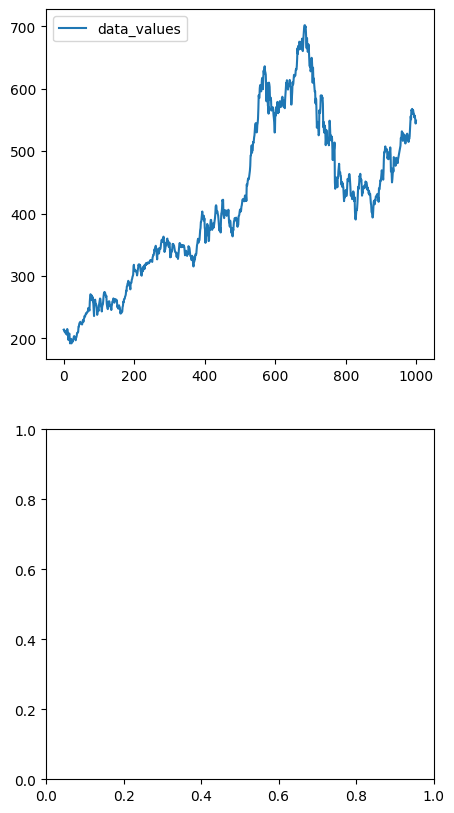

In [10]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])

plt.show()

**Plotting a time series (II)**  
You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

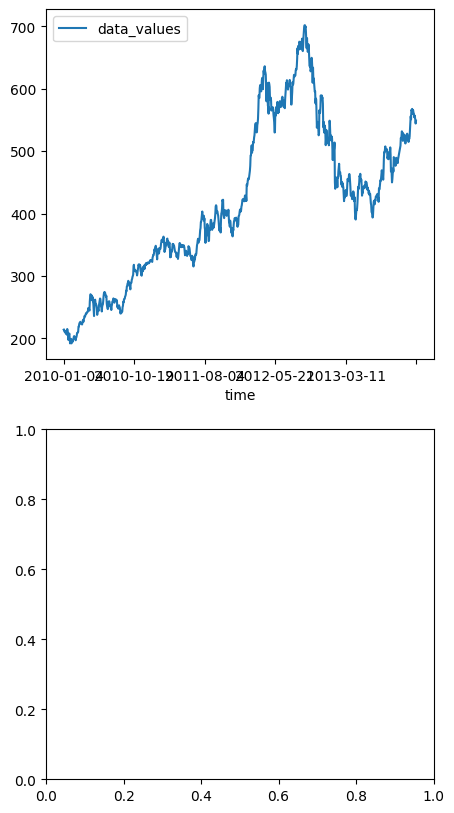

In [13]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data2.iloc[:1000].plot(x="time", y='data_values', ax=axs[0])

plt.show()

# As you can now see, each time series has a very different sampling frequency (the amount of time between samples).
# The first is daily stock market data, and the second is an audio waveform.

**Fitting a simple model: classification**  
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [15]:
from sklearn.svm import LinearSVC

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/flower.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
flower = pd.read_csv(url)
display(flower.head())

# Construct data for the model
X = flower[["petal length (cm)", "petal width (cm)"]]
y = flower[['target']].values.ravel() # Use .values.ravel() to get a 1D array

# Fit the model
model = LinearSVC()
model.fit(X, y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

**Predicting using a classification model**  
Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


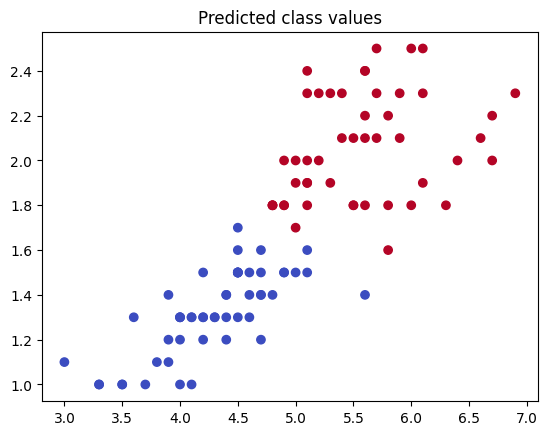

In [17]:
# Create input array
X_predict = flower[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

# Note that the output of your predictions are all integers, representing that datapoint's predicted class.

**Fitting a simple model: regression**  
In this exercise, you'll practice fitting a regression model using data from the California housing market. A DataFrame called housing is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

"MedHouseVal": the median house value for California districts (in $100,000s of dollars)
"AveRooms" : average number of rooms per dwelling

In [19]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/housing.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
housing = pd.read_csv(url)
display(housing.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = housing[['MedHouseVal']]
y = housing[['AveRooms']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

**Predicting using a regression model**  
Now that you've fit a model with the California housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

A 1-D array new_inputs consisting of 100 "new" values for "MedHouseVal" (median house value) is available in your workspace along with the model you fit in the previous exercise.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


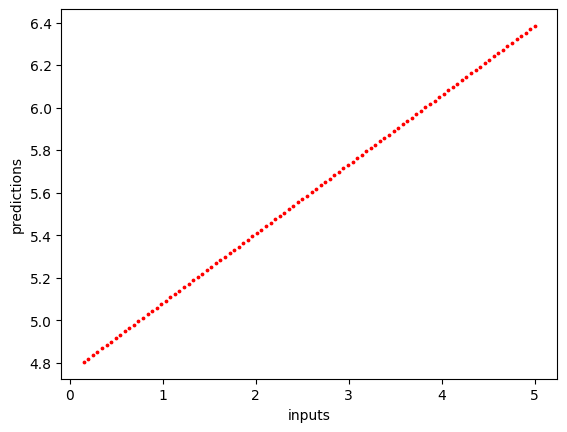

In [24]:
new_inputs = [0.14999, 0.1989801, 0.2479702, 0.2969603, 0.3459504, 0.39494051,
              0.44393061, 0.49292071, 0.54191081, 0.59090091, 0.63989101, 0.68888111,
              0.73787121, 0.78686131, 0.83585141, 0.88484152, 0.93383162, 0.98282172,
              1.03181182, 1.08080192, 1.12979202, 1.17878212, 1.22777222, 1.27676232,
              1.32575242, 1.37474253, 1.42373263, 1.47272273, 1.52171283, 1.57070293,
              1.61969303, 1.66868313, 1.71767323, 1.76666333, 1.81565343, 1.86464354,
              1.91363364, 1.96262374, 2.01161384, 2.06060394, 2.10959404, 2.15858414,
              2.20757424, 2.25656434, 2.30555444, 2.35454455, 2.40353465, 2.45252475,
              2.50151485, 2.55050495, 2.59949505, 2.64848515, 2.69747525, 2.74646535,
              2.79545545, 2.84444556, 2.89343566, 2.94242576, 2.99141586, 3.04040596,
              3.08939606, 3.13838616, 3.18737626, 3.23636636, 3.28535646, 3.33434657,
              3.38333667, 3.43232677, 3.48131687, 3.53030697, 3.57929707, 3.62828717,
              3.67727727, 3.72626737, 3.77525747, 3.82424758, 3.87323768, 3.92222778,
              3.97121788, 4.02020798, 4.06919808, 4.11818818, 4.16717828, 4.21616838,
              4.26515848, 4.31414859, 4.36313869, 4.41212879, 4.46111889, 4.51010899,
              4.55909909, 4.60808919, 4.65707929, 4.70606939, 4.75505949, 4.8040496,
              4.8530397,  4.9020298,  4.9510199,  5.00001   ]

# Generate predictions with the model using those inputs
predictions = model.predict(np.array(new_inputs).reshape(-1, 1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

## Machine learning and time series data

**Inspecting the classification data**  
In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public Kaggle competition.

In [ ]:
pip install kagglehub[pandas-datasets]

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kinguistics/heartbeat-sounds")

print("Path to dataset files:", path)

# https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds?resource=download
# download zip file

Path to dataset files: /root/.cache/kagglehub/datasets/kinguistics/heartbeat-sounds/versions/1


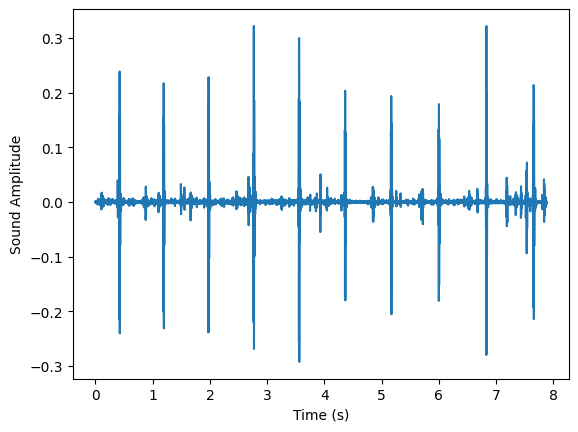

In [38]:
import librosa as lr
from glob import glob
import os

# The dataset was downloaded to this directory
dataset_dir = "/root/.cache/kagglehub/datasets/kinguistics/heartbeat-sounds/versions/1"

# Construct the path to the 'set_a' directory within the dataset
data_dir = os.path.join(dataset_dir, "set_a")

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

# There are several seconds of heartbeat sounds in here, though note that most of this time is silence.
#  A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.

**Inspecting the regression data**   
The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.



In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgawlik/nyse")

print("Path to dataset files:", path)

100%|██████████| 30.7M/30.7M [00:00<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dgawlik/nyse/versions/3


In [57]:
import kagglehub
import os
import pandas as pd

# Set the path to the downloaded dataset directory
dataset_dir = "/root/.cache/kagglehub/datasets/dgawlik/nyse/versions/3"

# List the files in the directory to find the data file(s)
print("Files in the dataset directory:", os.listdir(dataset_dir))

# Based on the dataset description, the data is likely in a CSV file.
# Let's assume the main data file is named 'prices.csv'.
# You may need to adjust the file name based on the output of the previous line.
data_file_path = os.path.join(dataset_dir, "prices.csv")

# Load the data using pandas read_csv
try:
    df = pd.read_csv(data_file_path)
    print("First 5 records:", df.head())
except FileNotFoundError:
    print(f"Error: The file '{data_file_path}' was not found.")
    print("Please check the output of the directory listing above to find the correct file name and update 'data_file_path'.")

Files in the dataset directory: ['prices-split-adjusted.csv', 'fundamentals.csv', 'prices.csv', 'securities.csv']
First 5 records:                   date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [69]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/prices2.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
prices = pd.read_csv(url)
display(prices.head())

,AAPL,FB,NFLX,V,XOM
0,214.009998,NaN,53.479999,88.139999,69.150002
1,214.379993,NaN,51.510001,87.129997,69.419998
2,210.969995,NaN,53.319999,85.959999,70.019997
3,210.580000,NaN,52.400001,86.760002,69.800003
4,211.980005,NaN,53.300002,87.000000,69.519997


                                     AAPL  FB       NFLX          V        XOM
1970-01-01 00:00:00.000000000  214.009998 NaN  53.479999  88.139999  69.150002
1970-01-01 00:00:00.000000001  214.379993 NaN  51.510001  87.129997  69.419998
1970-01-01 00:00:00.000000002  210.969995 NaN  53.319999  85.959999  70.019997
1970-01-01 00:00:00.000000003  210.580000 NaN  52.400001  86.760002  69.800003
1970-01-01 00:00:00.000000004  211.980005 NaN  53.300002  87.000000  69.519997


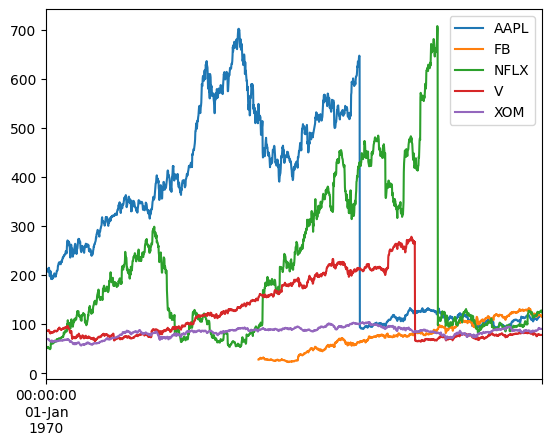

In [73]:
# Read in the data
data = pd.read_csv(url)



# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

# Note that each company's value is sometimes correlated with others, and sometimes not.
# Also note there are a lot of 'jumps' in there - what effect do you think these jumps would have on a predictive model?